# NLP
### Zaidan Mufaddhal

## Importing Libraries and Dataset

In [1]:
import numpy as np # to deal with array
import pandas as pd # to deal with data manipulation and analysis

import matplotlib.pyplot as plt # to plot visualization
import seaborn as sns # to plot visualization
%matplotlib inline

import warnings # to deal with error
warnings.filterwarnings('ignore')

from googletrans import Translator # to translate the text data
import nltk # f text preprocessing
import string # to get string data
from sklearn.svm import SVC # for modeling
from sklearn.metrics import classification_report,plot_confusion_matrix # evaluation

In [44]:
# importing dataset
data = pd.read_csv("C:/Users/zaida/Downloads/ecommerce_dataset/ecommerceDataset.csv",
                   names = ["Class","Description"])
data.head()

,Class,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
data.shape

(50425, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


## Data Preprocessing

In [46]:
data.isna().sum()

Class          0
Description    1
dtype: int64

In [47]:
data.dropna(inplace=True)

In [48]:
data.shape

(50424, 2)

In [49]:
data.describe()

,Class,Description
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [50]:
data['Class'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

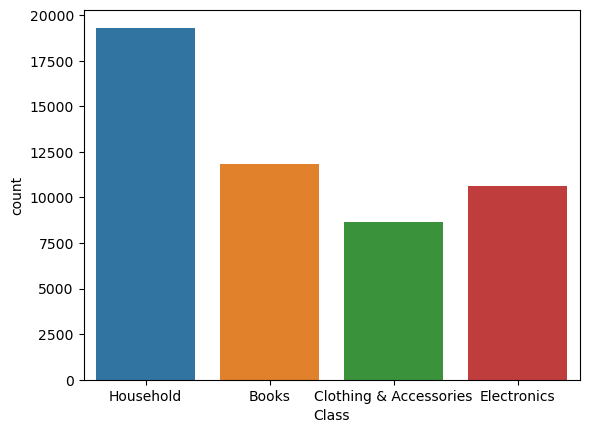

In [51]:
# plotting the class values
sns.countplot(data['Class'])

## Text Preprocessing

In [52]:
# use googletrans library to translate text data
translator = Translator()

### Lower Casing

In [54]:
# lower casing
data['Description'] = data['Description'].str.lower()
data.head()

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ..."
2,Household,saf 'uv textured modern art print framed' pain...
3,Household,"saf flower print framed painting (synthetic, 1..."
4,Household,incredible gifts india wooden happy birthday u...


### Removal of Punctuation

In [55]:
# Removal of punctuation
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

# Applying the function
data['Description'] = data['Description'].apply(lambda text:
                                                remove_punctuation(text))
data.head()

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


### Removing Stopwords

In [56]:
# Removing stopwords
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if
                     word.lower() not in stopwords.words('english')])

In [57]:
# appyling the function to the text data
data['Description']=data['Description'].apply(process_text)

In [58]:
data.head()

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


### Stemming

In [59]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

# Applying the function
data['Description']=data['Description'].apply(stemming)
data.head()  

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


### Creating The Bag of Words Model

In [60]:
# Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(data['Description'])

In [61]:
X.shape

(50424, 5000)

In [62]:
y = data['Class']

####  Splitting data into test and training set

In [63]:
# Importing a necessary library to split the data
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [64]:
cv.get_feature_names()[150:300]

['able',
 'abs',
 'abs plastic',
 'absolute',
 'absolutely',
 'absorb',
 'absorbent',
 'absorbing',
 'absorbs',
 'ac',
 'academic',
 'academy',
 'accent',
 'access',
 'accessible',
 'accessories',
 'accessory',
 'acclaimed',
 'accommodate',
 'according',
 'account',
 'accounting',
 'accuracy',
 'accurate',
 'accurate content',
 'accurate content books',
 'acer',
 'achieve',
 'achievement',
 'across',
 'acrylic',
 'act',
 'action',
 'action camera',
 'activated',
 'active',
 'activities',
 'activity',
 'acts',
 'actual',
 'actual item',
 'actual product',
 'actual product may',
 'actually',
 'adapter',
 'adapter cable',
 'adaptor',
 'add',
 'add touch',
 'added',
 'adding',
 'addition',
 'additional',
 'additional features',
 'additionally',
 'address',
 'adds',
 'adhesive',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'administration',
 'adopted',
 'adopted whole',
 'adopted whole new',
 'adorable',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'a

In [65]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## Modeling (SVM)

In [66]:
# Modeling SVM from sklearn library
svm = SVC(class_weight = 'balanced')

# Train the model
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

In [67]:
# Making prediction
y_pred = svm.predict(X_test)

In [68]:
# Creating a classification report
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

                 Books       0.90      0.96      0.93      3869
Clothing & Accessories       0.97      0.96      0.97      2892
           Electronics       0.95      0.94      0.95      3482
             Household       0.96      0.93      0.95      6397

              accuracy                           0.95     16640
             macro avg       0.95      0.95      0.95     16640
          weighted avg       0.95      0.95      0.95     16640



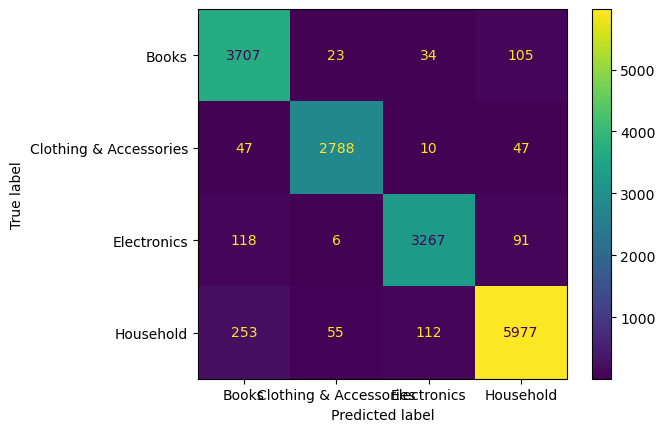

In [69]:
# Plotting confustion matrix
plot_confusion_matrix(svm,X_test,y_test)